<a href="https://colab.research.google.com/github/nmansour67/skills-introduction-to-github/blob/main/Support_Vector_machines_SVM_ML_Education.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Biopsy Data Preview:
   Cell Size  Cell Shape  Clump Thickness  Diagnosis
0   4.381350    9.386697         5.469910  Malignant
1   4.579309    2.468358         2.267688     Benign
2   8.633469    8.387822         9.046806  Malignant
3   3.650089    1.110661         4.713274     Benign
4   2.035120    1.854521         1.061826     Benign
5   2.760610    3.915346         1.708443     Benign
6   2.168579    1.954010         1.374699     Benign
7   9.178621    6.705332         9.450027  Malignant
8   1.082338    1.869254         3.194935     Benign
9   2.498160    1.094288         3.568127     Benign

Total Samples: 100

Diagnosis Distribution:
Diagnosis
Benign       65
Malignant    35
Name: count, dtype: int64
Benign: 65, Malignant: 35

Training Samples: 80
Testing Samples: 20

Training the Support Vector Machine...
SVM is finding the optimal 'margin of safety' between Benign and Malignant...
✓ Training complete!
✓ Found 13 support vectors (critical data points)

CLASSIFICATION RESULTS
Ac

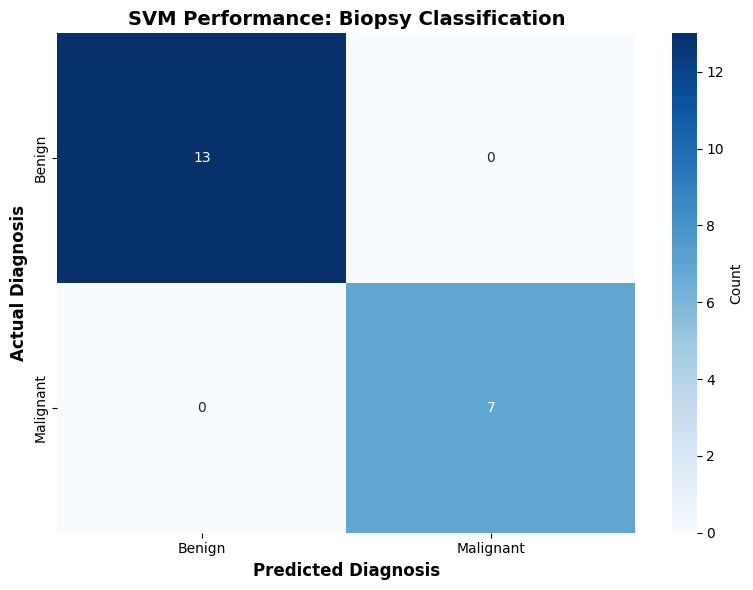


EXAMPLE: Analyze Individual Biopsy Results

Patient Profile (Gray Zone Case):
 Cell Size  Cell Shape  Clump Thickness
       5.2         5.8              5.5

SVM Classification: Malignant
Confidence: 94.9%
⚠️  Malignant prediction - recommend surgical consultation

HOW SVM WORKS: The 'Margin of Safety'

SVM doesn't just separate Benign from Malignant - it finds the WIDEST 
possible gap between the two groups. This 'margin of safety' means:

1. Maximum confidence in borderline cases
2. Better generalization to new patients
3. Fewer false positives (unnecessary biopsies)

The 13 support vectors are the critical data points that define 
this optimal boundary - like the patients who taught the system 
where to draw the line.



In [1]:
# ============================================
# Breast Biopsy Classification with SVM
# Support Vector Machine for Cancer Detection
# ============================================

# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# ============================================
# STEP 1: Load Your Data
# ============================================
# To upload your CSV in Google Colab, uncomment these lines:
# from google.colab import files
# uploaded = files.upload()
# df = pd.read_csv(list(uploaded.keys())[0])

# For demonstration, here's sample data (remove when using your CSV):
np.random.seed(42)
n_samples = 100

# Simulate realistic biopsy data with subtle patterns
sample_data = pd.DataFrame({
    'Cell Size': np.concatenate([
        np.random.uniform(1, 5, 65),      # Benign: smaller cells
        np.random.uniform(4, 10, 35)      # Malignant: larger cells
    ]),
    'Cell Shape': np.concatenate([
        np.random.uniform(1, 4, 65),      # Benign: more uniform
        np.random.uniform(5, 10, 35)      # Malignant: irregular
    ]),
    'Clump Thickness': np.concatenate([
        np.random.uniform(1, 5, 65),      # Benign: thinner
        np.random.uniform(5, 10, 35)      # Malignant: thicker
    ]),
    'Diagnosis': ['Benign']*65 + ['Malignant']*35
})

# Shuffle the data
sample_data = sample_data.sample(frac=1, random_state=42).reset_index(drop=True)

df = sample_data  # Replace with your actual CSV

print("Biopsy Data Preview:")
print(df.head(10))
print(f"\nTotal Samples: {len(df)}")
print(f"\nDiagnosis Distribution:")
print(df['Diagnosis'].value_counts())
print(f"Benign: {(df['Diagnosis']=='Benign').sum()}, Malignant: {(df['Diagnosis']=='Malignant').sum()}")

# ============================================
# STEP 2: Prepare the Data
# ============================================
# Separate features (X) and diagnosis (y)
X = df[['Cell Size', 'Cell Shape', 'Clump Thickness']]
y = df['Diagnosis']

# Convert Benign/Malignant to numbers (0 and 1)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded,
    test_size=0.2,
    random_state=42,
    stratify=y_encoded
)

# Scale the features (SVM works best with normalized data)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\nTraining Samples: {len(X_train)}")
print(f"Testing Samples: {len(X_test)}")

# ============================================
# STEP 3: Train the SVM Model
# ============================================
# Create SVM classifier with RBF kernel (best for complex patterns)
model = SVC(
    kernel='rbf',           # Radial Basis Function - finds curved boundaries
    C=1.0,                  # Regularization parameter
    gamma='scale',          # Controls decision boundary smoothness
    random_state=42,
    probability=True        # Enable probability predictions
)

print("\nTraining the Support Vector Machine...")
print("SVM is finding the optimal 'margin of safety' between Benign and Malignant...")
model.fit(X_train_scaled, y_train)
print("✓ Training complete!")
print(f"✓ Found {len(model.support_vectors_)} support vectors (critical data points)")

# ============================================
# STEP 4: Test the Model and Show Results
# ============================================
# Make predictions on test set
predictions = model.predict(X_test_scaled)
prediction_probs = model.predict_proba(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)

# Display main results
print("\n" + "="*70)
print("CLASSIFICATION RESULTS")
print("="*70)
print(f"Accuracy: {accuracy*100:.1f}% (Correctly classified {int(accuracy*len(y_test))} out of {len(y_test)} biopsies)")
print("="*70)

# Detailed Classification Report
print("\n" + "="*70)
print("CLASSIFICATION REPORT")
print("="*70)
print(classification_report(
    y_test,
    predictions,
    target_names=label_encoder.classes_,
    digits=3
))

# Confusion Matrix
print("="*70)
print("CONFUSION MATRIX")
print("="*70)
cm = confusion_matrix(y_test, predictions)
print(f"\n                    Predicted Benign    Predicted Malignant")
print(f"Actually Benign          {cm[0,0]:>5}              {cm[0,1]:>5}")
print(f"Actually Malignant       {cm[1,0]:>5}              {cm[1,1]:>5}")

# Calculate clinical metrics
tn, fp, fn, tp = cm.ravel()
sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
specificity = tn / (tn + fp) if (tn + fp) > 0 else 0

print(f"\nClinical Interpretation:")
print(f"  • Sensitivity (Catch Rate for Cancer): {sensitivity*100:.1f}%")
print(f"  • Specificity (Correctly ID Benign): {specificity*100:.1f}%")
print(f"  • False Positives (Unnecessary worry): {fp}")
print(f"  • False Negatives (Missed cancers): {fn} ⚠️")

# Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_,
            cbar_kws={'label': 'Count'})
plt.xlabel('Predicted Diagnosis', fontsize=12, fontweight='bold')
plt.ylabel('Actual Diagnosis', fontsize=12, fontweight='bold')
plt.title('SVM Performance: Biopsy Classification', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# ============================================
# STEP 5: Test on Individual Patient Cases
# ============================================
print("\n" + "="*70)
print("EXAMPLE: Analyze Individual Biopsy Results")
print("="*70)

# Example patient in the "gray zone"
gray_zone_patient = pd.DataFrame({
    'Cell Size': [5.2],
    'Cell Shape': [5.8],
    'Clump Thickness': [5.5]
})

# Scale the features
gray_zone_scaled = scaler.transform(gray_zone_patient)

# Make prediction
diagnosis_pred = model.predict(gray_zone_scaled)
diagnosis_prob = model.predict_proba(gray_zone_scaled)

diagnosis_label = label_encoder.inverse_transform(diagnosis_pred)[0]
confidence = diagnosis_prob[0][diagnosis_pred[0]] * 100

print(f"\nPatient Profile (Gray Zone Case):")
print(gray_zone_patient.to_string(index=False))
print(f"\nSVM Classification: {diagnosis_label}")
print(f"Confidence: {confidence:.1f}%")

if diagnosis_label == 'Malignant' and confidence > 95:
    print("⚠️  High-confidence malignant prediction - recommend immediate intervention")
elif diagnosis_label == 'Malignant':
    print("⚠️  Malignant prediction - recommend surgical consultation")
elif confidence > 90:
    print("✓  High-confidence benign - routine follow-up appropriate")
else:
    print("⚠️  Borderline case - consider additional testing or specialist review")

# ============================================
# STEP 6: Understanding the Decision Boundary
# ============================================
print("\n" + "="*70)
print("HOW SVM WORKS: The 'Margin of Safety'")
print("="*70)
print("""
SVM doesn't just separate Benign from Malignant - it finds the WIDEST
possible gap between the two groups. This 'margin of safety' means:

1. Maximum confidence in borderline cases
2. Better generalization to new patients
3. Fewer false positives (unnecessary biopsies)

The {} support vectors are the critical data points that define
this optimal boundary - like the patients who taught the system
where to draw the line.
""".format(len(model.support_vectors_)))